# Research Notebook
## Maximilian Heyne
## Date: Jan. 27 - Feb. 28

# 1: Experience


- We have been running a simulation on the Niagara cluster.
- Got to know more about the resource distribution software SLURM.
- Wrote Python code to make the additional 5 plots from the simulation data.
- Made changes to the parameter file for the Eddington accretion rate and plotting the graph for the Eddington limit  of 4.
- Changed the parameters for wind energy and wind velocity.



## Motivation:


We should get more familiar with running simulations on the Niagara cluster and therefore also with the resource distribution program SLURM. The motivation behind this is that we should learn more about the day-to-day use of scientific computing so that we are able to alter the parameters for the simulation to see what would benefit the growth of supermassive black holes in the early universe.

<span style="color: red;"> Good. Add to your motivation more about the overall aim of the research. What do you intend to use the supercomputer to do exactly? </span>

# 2: What? (What happened?)


First, we had to copy the Test_L100_256 from Professor Kannan's directory using the cp command to our directory and then had to change the Slurm file, which gave me some trouble, for it did not run on one node only, so that took some time to solve. But with the help of our tutor and Prof. K., it worked in the end. The solution was to take 2 nodes because one was not providing enough RAM.
With the results of the simulation, I extended the following program to read in the data from the path of the simulation results and made the plots for:

- Stellar mass vs. Gas mass
- Black hole mass vs. Gas mass
- Metallicity vs. Stellar mass
- Star formation vs. Stellar mass

The modification of the program was straightforward.

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Load data files
path_tempo = "/scratch/k/kannanr/maximus/test/Test_L100_256/output"
data_energy = np.loadtxt('energy.txt')
data_metal_stars = np.loadtxt('metals_stars.txt')
data_metals_tot = np.loadtxt('metals_tot.txt')
data_sfr = np.loadtxt('sfr.txt')
data_press = np.loadtxt('bh_pressure_threshold.txt')
data_cooling = np.loadtxt('cooling_metal_bins_AGN_Compton.txt')

# Check the shape of the data to ensure it's loaded correctly
print("Energy Data Shape:", data_energy.shape)
print("Metals Stars Data Shape:", data_metal_stars.shape)
print("Metals Total Data Shape:", data_metals_tot.shape)
print("SFR Data Shape:", data_sfr.shape)
print("Pressure Data Shape:", data_press.shape)
print("Cooling Data Shape:", data_cooling.shape)

# Snapshot and file path settings
snapshot = 13
path = "/scratch/k/kannanr/skoehler/arepo/CS-L100-850/Unmod-ICs-run/output/"
gname = str.format('{0:03.0f}', snapshot)
num1 = 0
num1name = str(num1)
file1 = path + "/groups_" + gname + "/fof_subhalo_tab_" + gname + "." + num1name + ".hdf5"
ds = {'filename': file1}

# Read file metadata
with h5py.File(file1, 'r') as f:
    for key in f['Header'].attrs.keys():
        ds[key] = f['Header'].attrs[key]
numfiles = ds['NumFiles']

# Initialize arrays for mass data
num1 = 0
bhmass = []
stmass = []
halo_mass = []
gas_mass = []
metallicity = []

# Loop through the files and load the required data
while(num1 < numfiles):
    num1name = str(num1)
    curfile = path + "/groups_" + gname + "/fof_subhalo_tab_" + gname + "." + num1name + ".hdf5"
    with h5py.File(curfile, 'r') as f:
        data = np.array(f["Subhalo/SubhaloBHMass"])  # Black hole mass
        data1 = np.array(f["Subhalo/SubhaloMassType"][:, 0])  # Stellar mass
        data2 = np.array(f["Subhalo/SubhaloMass"])  # Halo mass
        data3 = np.array(f["Subhalo/SubhaloMassType"][:, 4])  # Gas mass
        data4 = np.array(f["Subhalo/SubhaloSFR"])  # Star formation rate
        data5 = np.array(f["Subhalo/SubhaloGasMetallicity"])  # Metallicity

        # Append data to arrays
        if num1 == 0:
            bhmass = data
            stmass = data1
            halo_mass = data2
            gas_mass = data3
            sfr = data4
            metallicity = data5
        else:
            bhmass = np.concatenate((bhmass, data))
            stmass = np.concatenate((stmass, data1))
            halo_mass = np.concatenate((halo_mass, data2))
            gas_mass = np.concatenate((gas_mass, data3))
            sfr = np.concatenate((sfr, data4))
            metallicity = np.concatenate((metallicity, data5))

    num1 += 1

# Generateing the 5  plots using the new data from the text files

# 1. Stellar mass vs Halo mass 
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(stmass * 1e10 / 0.6774, halo_mass * 1e10 / 0.6774)
plt.xlabel("Stellar Mass (Log)")
plt.ylabel("Halo Mass (Log)")
plt.title("Stellar Mass vs Halo Mass")
plt.grid()
plt.savefig("StellarMassHaloMass.png")
plt.show()

# 2. Stellar mass vs Gas mass 
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(stmass * 1e10 / 0.6774, gas_mass * 1e10 / 0.6774)
plt.xlabel("Stellar Mass (Log)")
plt.ylabel("Gas Mass (Log)")
plt.title("Stellar Mass vs Gas Mass")
plt.grid()
plt.savefig("StellarMassGasMass.png")
plt.show()

# 3. Black hole mass vs Gas mass 
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(bhmass * 1e10 / 0.6774, gas_mass * 1e10 / 0.6774)
plt.xlabel("Black Hole Mass (Log)")
plt.ylabel("Gas Mass (Log)")
plt.title("Black Hole Mass vs Gas Mass")
plt.grid()
plt.savefig("BlackHoleMassGasMass.png")
plt.show()

# 4. Metallicity vs Stellar mass 
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(metallicity, stmass * 1e10 / 0.6774)
plt.xlabel("Metallicity")
plt.ylabel("Stellar Mass (Log)")
plt.title("Metallicity vs Stellar Mass")
plt.grid()
plt.savefig("MetallicityStellarMass.png")
plt.show()

# 5. Star formation rate vs Stellar mass 
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(sfr, stmass * 1e10 / 0.6774)
plt.xlabel("Star Formation Rate")
plt.ylabel("Stellar Mass (Log)")
plt.title("Star Formation Rate vs Stellar Mass")
plt.grid()
plt.savefig("SFRStellarMass.png")
plt.show()


# Eddington limit, wind energy and wind velocity


We wanted to see if the change of the Eddington limit leads to bigger supermassive Black Holes (SMBH), therefore we allowed the so-called mildly super Eddington accretion by changing the limit from 1, 2, 4 (in my case), and 5.
The Eddington luminosity or Eddington limit is a theoretical upper limit on the luminosity (brightness) of an astronomical object, like a star or a black hole, beyond which the outward pressure from radiation equals the gravitational pull trying to collapse the object. Therefore, a higher limit should enable faster growth and result in a bigger mass of the black holes.
It is given by the following formula:

\begin{equation*}
    L_{Edd} = \frac{ 4\pi GMm_{p}c}{\sigma_T}
\end{equation*}

$G$ is the gravitational constant, $M$ the mass of the black hole, $m_p$ the mass of a proton, $c$ the speed of light, and $\sigma_T$ the Thomson scattering cross-section of the electron.

For the other simulations, we changed the wind energy from 3.6 to 2.0, 1.0 (for me), 0.5, and 0.2, and the wind velocity from 350.0 to 200.0 (for me), 150.0, 100.0, and 50.0 to see if this would have an effect on whether the black hole mass would increase.
For these simulations, we had the Eddington limit set to 5.

The wind energy is also an essential part of black hole growth. While the black hole accretes and forms an accretion disk, the accreting material gets denser and heats up, which leads to outflows once the radiation pressure is big enough (Eddington limit).
By changing the wind energy to a lower value, we expect the black hole to grow faster by not losing as much material due to the outflow.

Another important factor for black hole growth is the wind velocity. It determines how much energy is transferred away by the winds. The higher the wind velocity, the more energy is lost and not accreted into the black hole.
Therefore, we expect that a lower wind velocity would lead to bigger SMBHs.

We have also been working with Gadget-4, which is a parallel cosmological N-body and SPH code designed to simulate cosmic structure formation and calculations relevant for galaxy evolution and galactic dynamics. But we did not get it to work yet on the Niagara cluster, so we have to see if we can reproduce some of the values in the next week to compare them to our results.

<span style="color: red;"> Good explanation. </span>

# Program for plotting Eddington limit, wind energy and wind velocity


To make the plots for the Eddington limit, wind energy, and wind velocity, I had to alter the program.
At first, I created a function that loops through the HDF5 files and gets the specific data for the black hole mass and for the stellar mass (specifically from the 5th column). The first file's data gets assigned respectively to the $bhmass$ and $stmass$, and the following data is concatenated to the existing data using $np.concatenate$.
After processing all files, the mass gets multiplied by $1e10 / h$ for proper units, and at the end, it returns the $bhmass$ and $stmass$.

Now, the $snapshot$ is set to 13 to format the group name $gname$. Next, $gname$ is formatted in a string, which is used to identify the specific group.
Following that, the program processes five different datasets stored at different paths and puts them into a list called $paths$.

In the next step, the program loops through each $path$ in the $paths$ list and processes the corresponding data. For each, the program reads the first file to get the number of files, $numfiles$. This is made possible by accessing the $NumFiles$ attribute in the "Header" of the HDF5 file.
Now, for each dataset, the $process_data(path, gname, numfiles)$ function is called. It reads in the data and aggregates the black hole and stellar masses into single arrays and also converts the units.
In the end, the results are appended to the two lists $bhmasses$ and $stmasses$.

The plot than is more straightforward.

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def process_data(path, gname, numfiles):
    bhmass = []
    stmass = []
    
    # Loop through all files and aggregate data
    for num1 in range(numfiles):
        num1name = str(num1)
        curfile = f"{path}/groups_{gname}/fof_subhalo_tab_{gname}.{num1name}.hdf5"
        with h5py.File(curfile, 'r') as f:
            data_bh = np.array(f["Subhalo/SubhaloBHMass"])
            data_st = np.array(f["Subhalo/SubhaloMassType"][:, 4])
            
            if num1 == 0:
                bhmass = data_bh
                stmass = data_st
            else:
                bhmass = np.concatenate((bhmass, data_bh))
                stmass = np.concatenate((stmass, data_st))
    
    # Convert masses to appropriate units
    bhmass *= 1e10 / h
    stmass *= 1e10 / h
    
    return bhmass, stmass

snapshot = 13
h = 0.6774
gname = str.format('{0:03.0f}', snapshot)

# File paths for different datasets
paths = [
    "/scratch/k/kannanr/maximus/test/Test_L100_256/output", #  Wind energy of 3.6 (default)
    "/scratch/k/kannanr/hamza25/output3wind/",  # Wind energy of 2
    "/scratch/k/kannanr/maximus/test1/Test_L100_256/output", # Wind energy of 1 
    "/scratch/k/kannanr/camila03/test2/Test_L100_256/output", # Wind energy of 0.5
    "/scratch/k/kannanr/partikc/test6bh5WE0dot2/Test_L100_256/output" # Wind energy of 0.2
]

# Process data for all paths
bhmasses = []
stmasses = []
for path in paths:
    # Read first file to get number of files
    num1name = "0"
    file1 = f"{path}/groups_{gname}/fof_subhalo_tab_{gname}.{num1name}.hdf5"
    with h5py.File(file1, 'r') as f:
        numfiles = f['Header'].attrs['NumFiles']
    
    bhmass, stmass = process_data(path, gname, numfiles)
    bhmasses.append(bhmass)
    stmasses.append(stmass)

# Plot the data
plt.figure(figsize=(8, 6))

labels = ["Wind En 3.6", "Wind En 2.0", "Wind En 1.0", "Wind En 0.5", "Wind En 0.2"]
for i, (stmass, bhmass) in enumerate(zip(stmasses, bhmasses)):
    plt.scatter(stmass, bhmass, label=labels[i], alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stellar Mass ")
plt.ylabel("Black Hole Mass ")
plt.title("Stellar Mass vs. Black Hole Mass with diff Wind Energy ")
plt.legend()
plt.grid(True)

plt.savefig("StellarBhmassWindEnergy.png")


# 3: So what? (What does it mean?)


These are the graphs for the 5 plots for the simulation with higher resolution.
At first, we have the plots for which we used already existing high-resolution data for:


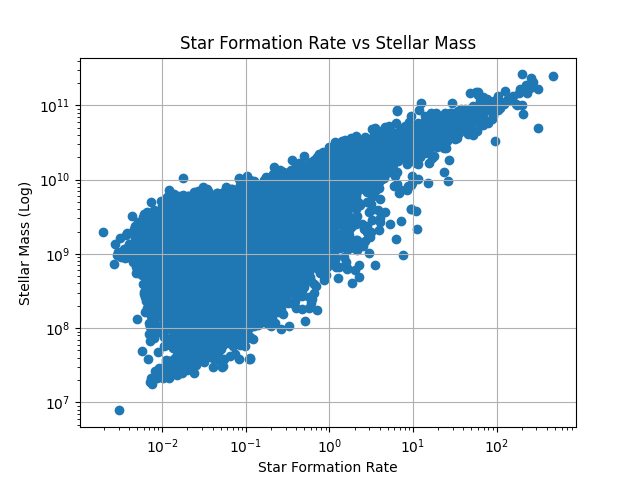 
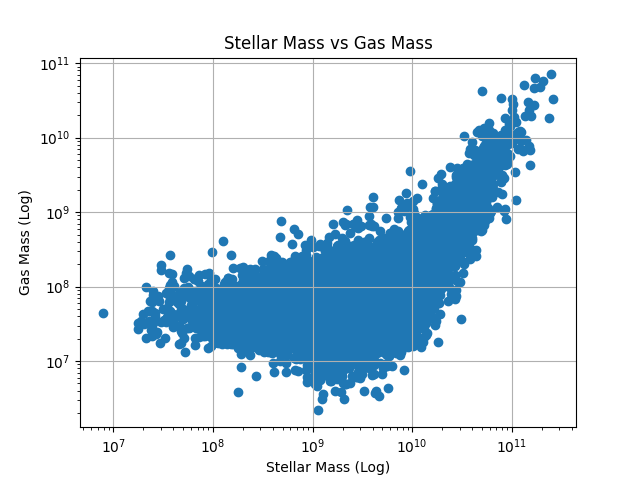 
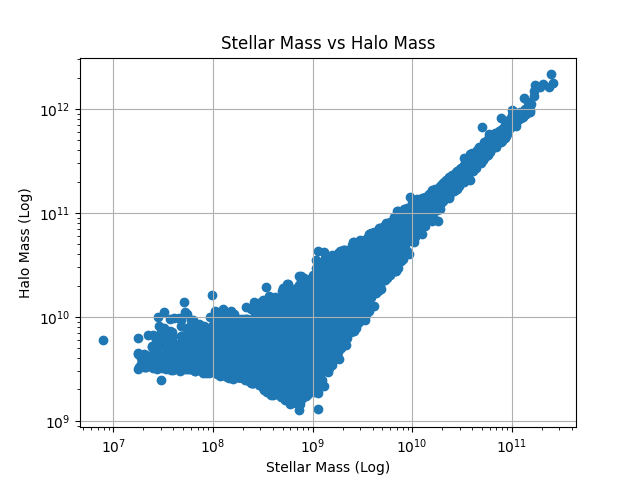 
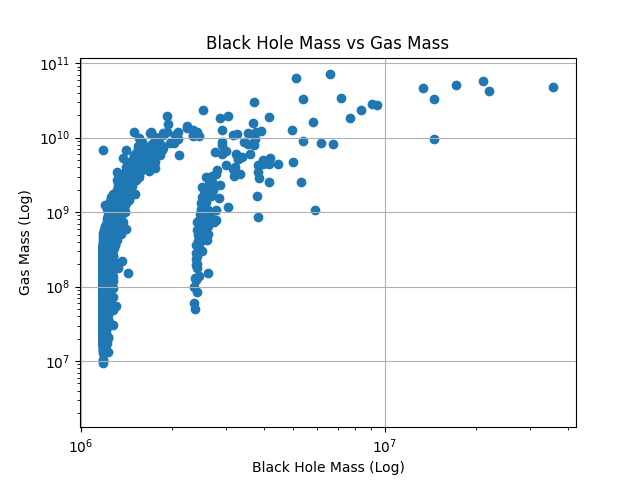 
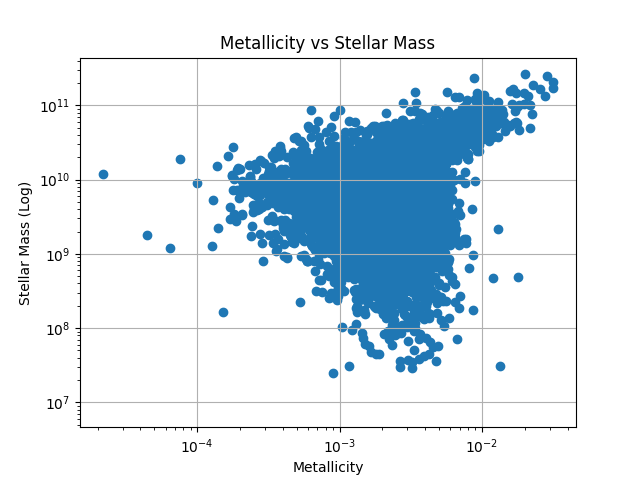


Then we have the same plots for the data from our own simulation, which has a lower resolution:


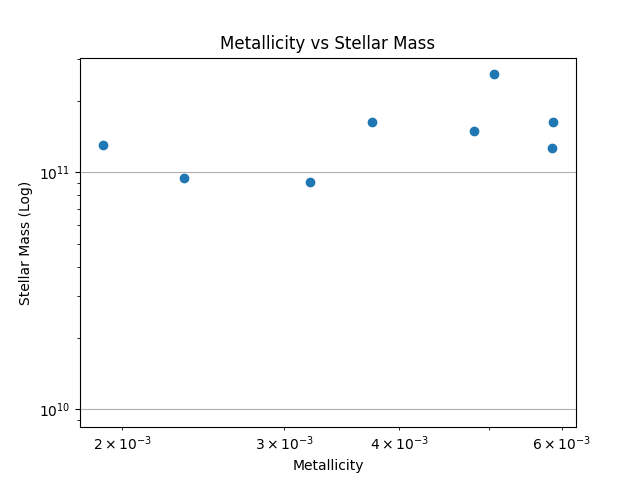 
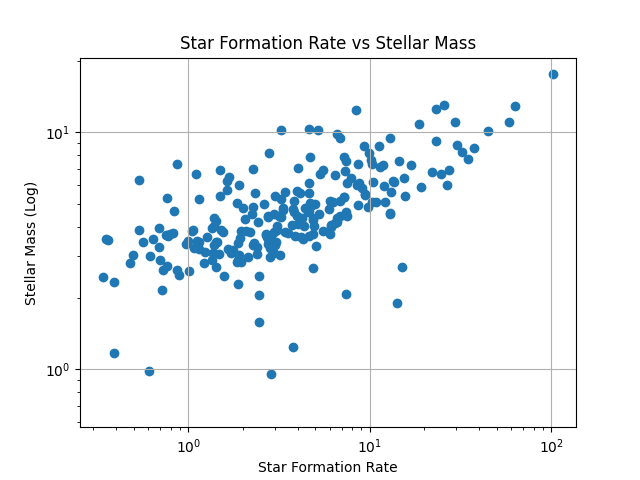 
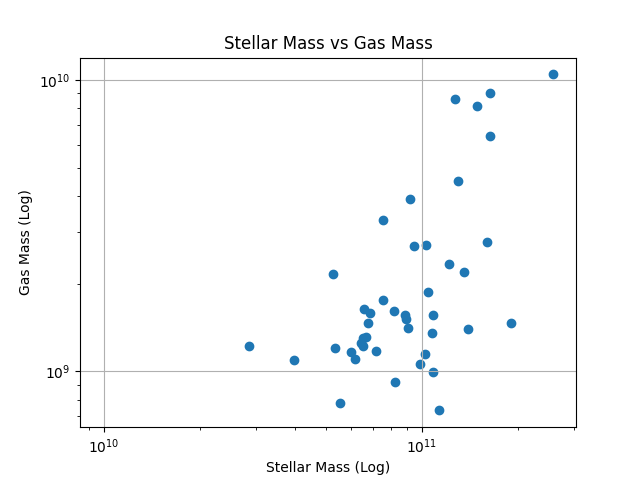 
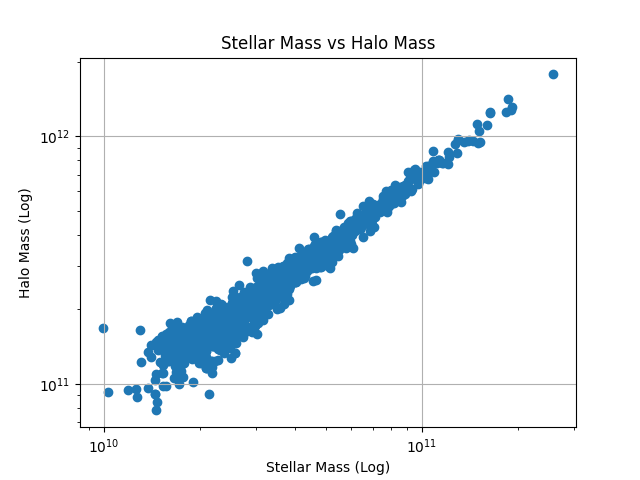 
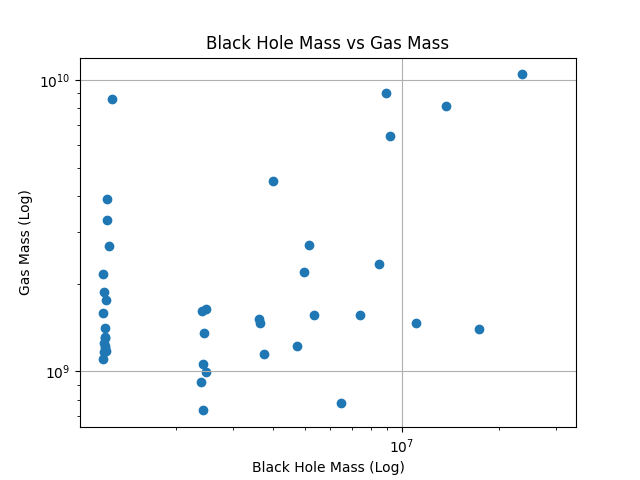


Here, we can clearly see the difference in resolution compared to the graphs with the data from the lower resolution simulation.
These plots were more to get familiar with running simulations and making plots.


# Eddington Limit


The graph for the different Eddington Limits of 1, 2, 3, 4 (for me), and 5 is having the problem that the points are scattered, and there cannot really be made a clear assumption on whether a higher Eddington limit leads to higher black hole mass and stellar mass. This is also influenced by the lower resolution we ran the simulation at.
For more precise results, we would need to apply binning on the data points to be able to compare them better.
Despite the problems with the resolution and the binning, it seems there is a visible tendency toward higher Eddington limits leading to higher black hole mass and stellar mass.
Clarifying this will be the task for the coming weeks.


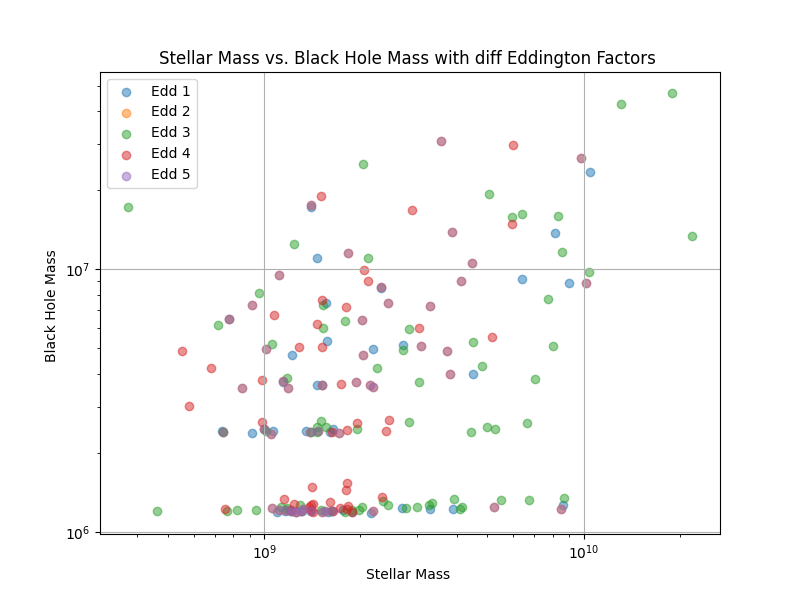


# Wind Velocity


For the wind velocity, we kept the Eddington limit at 5 and had different values for the wind velocity. The default was 350.0, and we changed it to 200.0, 150.0, 100.0, and 50.0, and plotted them all in one graph.


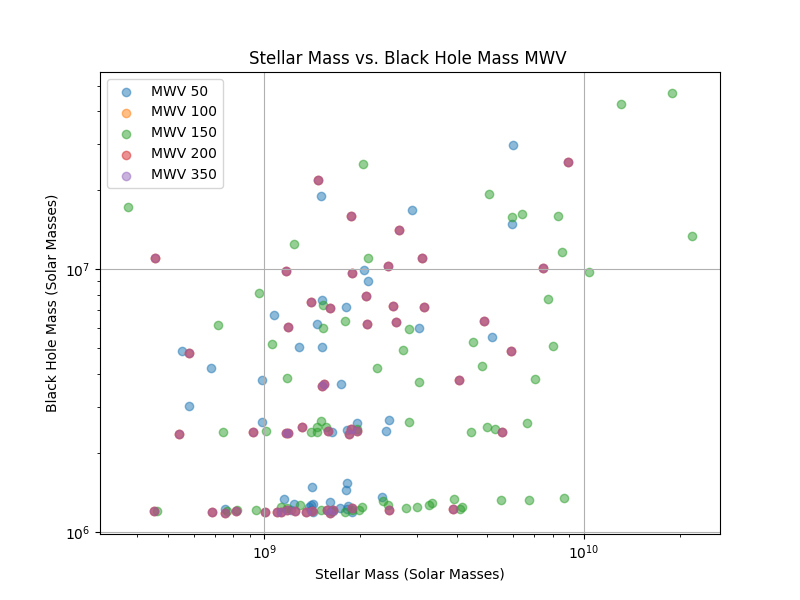


Also here, we encounter the same problem as before with the Eddington limit, where the choice of our plot makes the comparison quite difficult.


# Wind Energy


For the wind energy, we also kept the Eddington limit at 5 and then changed the parameters for the wind energy from the default of 3.6 to 2.0, 1.0 (for me), 0.5, and 0.2.


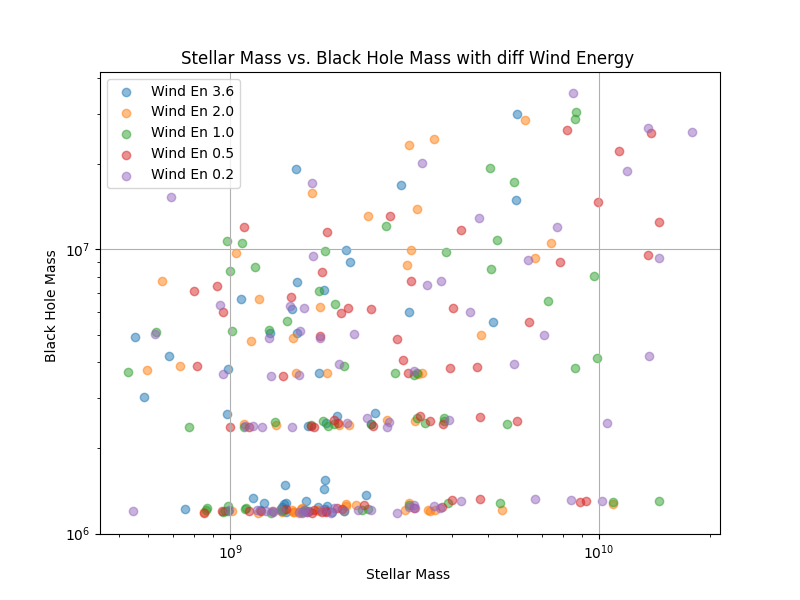


Here, the same applies as for the graph of the Eddington limit and the wind velocity — that there cannot clearly be seen that lower wind energies lead to higher black hole and stellar mass, although it hints in that direction when looking at some of the points for wind energy of 0.5 and 0.2.
For the coming weeks, we will also work on the binning of the data points and consider rerunning the simulations with higher resolutions to get more evidence.


<span style="color: red;"> Nice plots. Please add descriptions of each and what they mean. </span>

# 4. Now what? (What's next?)


For the coming weeks, we will focus on altering the plot so that the datapoints are bound for better comparison and also try to fit in some lines in the graph to also improve the visibility.

We will also make new simulations where we change the parameter for the black hole radiative efficiency to 0.2, 0.1, 0.05, and 0.01, and keep the other parameters for wind energy at 0.2, for the wind velocity at 50.0, and for the Eddington limit at 5.

We also want to change the axes for stellar mass and black hole mass for the plots of wind energy, Eddington limit, and wind velocity to be able to see more clearly if the stellar mass is also increasing

Then, we also will change the snapshots for the redshift so that we can go down all the way to a redshift of zero to get clearer and more data.

At last, we want to produce some data with Gadget-4 to compare them to our data.


<span style="color: red;"> okay. Try and tie this back to an overall motivation. Why are these important next steps in view of your research aims? </span>

# 5. Bibliography


https://arxiv.org/pdf/1911.05791

<span style="color: red;"> Please cite using an accepting citation format. </span>

| Category       | Points      |
| ------------- |:------------:|
| Formatting    |       2       |
| Experience    |       2       |
| What?         |       1       |
| So what?      |       3       |
| Now what?     |       3       |
| Bibliography  |       1       |
| Style         |       3       |
| Total         |       15      |